# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [13]:
#!!pip uninstall tensorflow
#!pip install tensorflow==2.0.0

In [14]:
import tensorflow as tf

## Get Required Files from Drive

In [15]:
#from google.colab import drive
#drive.mount('/content/drive/')
#For this assignment we will use the local copy

In [16]:
#Set your project path 
##Using data from local disk
project_path =  './data/'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [17]:
#Import needed libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Read local copy of the data into an pandas df
headlines_df = pd.read_json(project_path + "Sarcasm_Headlines_Dataset.json",lines=True)

In [19]:
#Sanity check
headlines_df.sample()

,article_link,headline,is_sarcastic
20725,https://www.huffingtonpost.com/entry/a-letter-...,a letter to parents at the start of a new scho...,0


In [20]:
#Quick info
headlines_df.info()

#No null labels in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    26709 non-null object
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [21]:
#Check is_sarcastic values
headlines_df.is_sarcastic.unique()

#Two classes as given in the problem statement

array([0, 1], dtype=int64)

In [22]:
#Check the distribution of labels
headlines_df.is_sarcastic.value_counts()

#Slight imbalance towards non sarcastic class

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [23]:
#Check sample headlines
list(headlines_df.headline.sample(5))

#Samples indicate that some cleaning has happened. All the words are in lower case
#Only regular punctuation is seen with no special characters as these are headlines
#Sentences seem to follow proper syntax and grammar as expected from news headlines
#Overall the content has very little to no noise and can be used for processing directly
#Length of the sentences is handled below

["pope francis spends weekend installing stained glass storm windows in st. peter's basilica",
 'powerball officials remove plastic balls from pig urine brine',
 'katsuya brentwood and beyond',
 "'st. elsewhere' pa grilled by howie mandel's biographer",
 'detective trying to get into mind of litterer']

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [24]:
#Dropping article_link as this will not be used
headlines_df.drop("article_link",axis=1,inplace=True)

In [25]:
#sanity
headlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(1)
memory usage: 417.4+ KB


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [26]:
#Get the length of each headline
headlines_df.headline.str.len().sort_values(ascending=False)


#Lengths range from 7 to 254
#Max length is 254
#We will pad all our sentences to use 254 characters

19868    254
17306    238
15247    237
21783    228
11220    199
7837     190
23473    154
15944    152
24798    149
21262    145
7080     145
16936    143
7526     143
13311    143
11026    143
8637     142
11625    141
9667     141
8922     139
5371     139
5812     139
10879    138
23978    137
3066     137
21924    137
3848     137
5842     136
10811    134
17200    133
14893    133
        ... 
6432      12
1378      12
13468     12
14462     12
25609     12
20972     12
25992     11
6276      11
2772      11
12193     11
19789     11
21737     11
4285      11
11844     11
26092     11
7315      11
7724      11
21101     11
22647     11
3635      10
4988      10
8641       9
6919       9
19767      9
14224      9
22596      8
12208      8
11354      8
9973       8
20551      7
Name: headline, Length: 26709, dtype: int64

In [27]:
print("Max Sentence Length: ",headlines_df.headline.str.len().sort_values(ascending=False).max())

Max Sentence Length:  254


#**## Modelling**

## Import required modules required for modelling.

In [28]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [29]:
max_features = 10000
maxlen = 254 ## Add your max length here ##
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [30]:
#Initialize tokenizer
tokenizer = Tokenizer(num_words=max_features)

In [31]:
#Fit on headlines
tokenizer.fit_on_texts(headlines_df.headline)

# Define X and y for your model.

In [32]:
#X will be the word indexes of the words in the headlines
#y will be the is_sarcastic values

X = tokenizer.texts_to_sequences(headlines_df.headline)

#pad with max length to make all inputs of equal size to feed into LSTM layers
X = pad_sequences(X, maxlen = maxlen)

y = np.asarray(headlines_df.is_sarcastic)

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [33]:
#Check the shape of X
print("Original Shape",X.shape)


Original Shape (26709, 254)


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [34]:
#Check the vocab 
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

In [35]:
#Vocab size will be the length 
num_words = len(tokenizer.word_index)
num_words

29656

In [36]:
##Save the tokenizer
import pickle

In [37]:
pickle.dump(tokenizer,open('tokenizer_headlines','wb'))

#**## Word Embedding**

## Get Glove Word Embeddings

In [38]:
#glove_file = project_path + "glove.6B.zip"

In [39]:
#Extract Glove embedding zip file
#from zipfile import ZipFile
#with ZipFile(glove_file, 'r') as z:
 # z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [41]:
#We will use the embedding size 200
EMBEDDING_FILE = project_path + './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE,encoding="utf8"):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    ##print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [42]:
#Get the Glove embedding mapped to the index of each word for use in Embedding layer

embedding_matrix = np.zeros((num_words + 1, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#len(embeddings.values())

In [43]:
len(embedding_matrix)

29657

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [44]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [65]:
#Initialize the model
model = Sequential()

#Add Embedding layer - vector size = 200, non trainable
model.add(Embedding(num_words +1 ,200,weights = [embedding_matrix],trainable=False,input_length=maxlen))

#Add the single BiLSTM layer
#By default this will concatenate the o/p final hidden state of forward and backward LSTM layers
model.add(Bidirectional(LSTM(128,return_sequences=False)))

#Add the Dense layer
model.add(Dense(128,activation="relu"))

#Add final output layer
model.add(Dense(1,activation="sigmoid"))


In [66]:
#Check the summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 254, 200)          5931400   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 6,301,321
Trainable params: 369,921
Non-trainable params: 5,931,400
_________________________________________________________________


In [67]:
#Compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [68]:
batch_size = 100
epochs = 5

#Train the model
history = model.fit(X,y,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 4226s 198ms/sample - loss: 0.5050 - accuracy: 0.7454 - val_loss: 0.4144 - val_accuracy: 0.8068
Epoch 2/5
21367/21367 [==============================] - 4203s 197ms/sample - loss: 0.3615 - accuracy: 0.8392 - val_loss: 0.3637 - val_accuracy: 0.8345
Epoch 3/5
21367/21367 [==============================] - 5615s 263ms/sample - loss: 0.2991 - accuracy: 0.8734 - val_loss: 0.3341 - val_accuracy: 0.8521
Epoch 4/5
21367/21367 [==============================] - 6639s 311ms/sample - loss: 0.2523 - accuracy: 0.8936 - val_loss: 0.3445 - val_accuracy: 0.8572
Epoch 5/5
21367/21367 [==============================] - 4095s 192ms/sample - loss: 0.2094 - accuracy: 0.9121 - val_loss: 0.3669 - val_accuracy: 0.8510


In [73]:
##After 5 Epochs validation accuracy started to go down at about 85.1% while training accuracy continues to go up at about 91.2%
##There is clearly overfitting seen and we will need to add dropouts to see if we can regularize

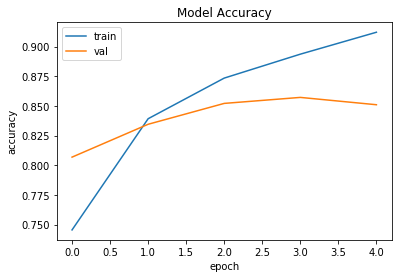

In [72]:
#Plot the training and validation accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [95]:
#save the model for use later
model.save('headlines_sarcastic_basic.hd5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: headlines_sarcastic_basic.hd5\assets


### Model 2: Adding dropout layers

In [74]:
##Second model with dropouts
#Initialize the model
modelr = Sequential()

#Add Embedding layer - vector size = 200, non trainable
modelr.add(Embedding(num_words +1 ,200,weights = [embedding_matrix],trainable=False,input_length=maxlen))

#Add the single BiLSTM layer
#By default this will concatenate the o/p final hidden state of forward and backward LSTM layers

modelr.add(Bidirectional(LSTM(128,return_sequences=False)))

#Add an dropput layer
modelr.add(Dropout(0.2))

#Add the Dense layer
modelr.add(Dense(128,activation="relu"))

#Add an dropput layer
modelr.add(Dropout(0.2))

#Final o/p layer
modelr.add(Dense(1,activation="sigmoid"))

In [75]:
#Check the summary of the model
modelr.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 254, 200)          5931400   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               336896    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 6,301,321
Trainable params: 369,921
Non-trainable params: 5,931,400
______________________________________

In [76]:
#Compile the model
modelr.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [77]:
batch_size = 100
epochs = 5

#Train the model
historyr = modelr.fit(X,y,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 4287s 201ms/sample - loss: 0.5126 - accuracy: 0.7412 - val_loss: 0.4234 - val_accuracy: 0.8066
Epoch 2/5
21367/21367 [==============================] - 4326s 202ms/sample - loss: 0.3974 - accuracy: 0.8245 - val_loss: 0.3653 - val_accuracy: 0.8368
Epoch 3/5
21367/21367 [==============================] - 17048s 798ms/sample - loss: 0.3221 - accuracy: 0.8589 - val_loss: 0.3292 - val_accuracy: 0.8587
Epoch 4/5
21367/21367 [==============================] - 4382s 205ms/sample - loss: 0.2811 - accuracy: 0.8810 - val_loss: 0.3352 - val_accuracy: 0.8478
Epoch 5/5
21367/21367 [==============================] - 4596s 215ms/sample - loss: 0.2449 - accuracy: 0.8982 - val_loss: 0.3346 - val_accuracy: 0.8568


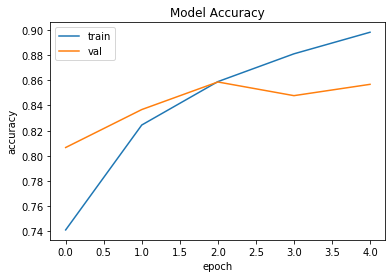

In [92]:
#Plot the training and validation accuracy 
plt.plot(historyr.history['accuracy'])
plt.plot(historyr.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#We can see that the dropouts did change the train and val accuracy..though there is still instability in learning
#in the the 5 epochs. 
#More tuning of the layers and learning parameters should bring this down. 
#The accuracy itself did not significantly improve or drop

In [96]:
#save the model for use later
modelr.save('headlines_sarcastic_dropouts.hd5')

INFO:tensorflow:Assets written to: headlines_sarcastic_dropouts.hd5\assets


### Model 3: Adding Global Max pooling layer

In [46]:
###Adding Max Pooling after concatentating each of the individual states
#Initialize the model
modelg = Sequential()

#Add Embedding layer - vector size = 200, non trainable
modelg.add(Embedding(num_words +1 ,200,weights = [embedding_matrix],trainable=False,input_length=maxlen))

#Add the single BiLSTM layer
#Setting return_sequences=True and adding GlobalMaxPool to get the final feature states

modelg.add(Bidirectional(LSTM(128,return_sequences=True)))

#Add an global pooling layer
modelg.add(GlobalMaxPool1D())

#Add the Dense layer
modelg.add(Dense(128,activation="relu"))

modelg.add(Dropout(0.2))

modelg.add(Dense(1,activation="sigmoid"))

In [47]:
#Check the summary of the model
modelg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 254, 200)          5931400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 254, 256)          336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,301,321
Trainable params: 369,921
Non-trainable params: 5,931,400
______________________________________

In [48]:
#Compile the model
modelg.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [49]:
batch_size = 100
epochs = 5

#Train the model
historyg = modelg.fit(X,y,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 3191s 149ms/sample - loss: 0.4683 - accuracy: 0.7722 - val_loss: 0.4087 - val_accuracy: 0.8092
Epoch 2/5
21367/21367 [==============================] - 3002s 140ms/sample - loss: 0.3197 - accuracy: 0.8637 - val_loss: 0.3376 - val_accuracy: 0.8506
Epoch 3/5
21367/21367 [==============================] - 2894s 135ms/sample - loss: 0.2429 - accuracy: 0.9015 - val_loss: 0.3279 - val_accuracy: 0.8592
Epoch 4/5
21367/21367 [==============================] - 2864s 134ms/sample - loss: 0.1730 - accuracy: 0.9334 - val_loss: 0.3456 - val_accuracy: 0.8587
Epoch 5/5
21367/21367 [==============================] - 2899s 136ms/sample - loss: 0.1125 - accuracy: 0.9609 - val_loss: 0.4055 - val_accuracy: 0.8574


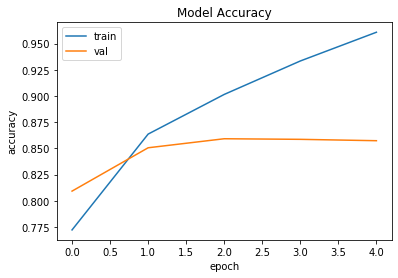

In [51]:
#Plot the training and validation accuracy 
plt.plot(historyg.history['accuracy'])
plt.plot(historyg.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#There is clear case of overfitting here. We can see that the validation accuracy is still hovering around 85%
#while the training accuracy has reached 96% within 5 Epochs

In [53]:
#save the model for use later
modelg.save('headlines_sarcastic_globalpool.hd5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: headlines_sarcastic_globalpool.hd5\assets
